In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = sns.load_dataset('diamonds')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [6]:
print(df.cut.unique())
print(df.color.unique())
print(df.clarity.unique())

['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
['E' 'I' 'J' 'H' 'F' 'G' 'D']
['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


# Label Encoding
## LabelEncoder

In [10]:
from sklearn.preprocessing import OrdinalEncoder


le = OrdinalEncoder(dtype=int) # dtype=int results in integer categories
ar = le.fit_transform(df[['color']])  # result is a numpy array!

print(le.categories_)  # take a look at the identified categories (position in list == encoded value)

# the OrdinalEncoder of scikit-learn only returns the encoded column 
# --> manual adding to the original dataframe required
pd.DataFrame(ar).head()  

[array(['D', 'E', 'F', 'G', 'H', 'I', 'J'], dtype=object)]


,0
0,1
1,1
2,1
3,5
4,6


## Pandas map

In [8]:
df.color.unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [9]:
mapping = {'E':1, 'I':2, 'J':3, 'H':4, 'F':5, 'G':6, 'D':7}
df['color_mapped'] = df['color'].map(mapping)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,color_mapped
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,1
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,1
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,1
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,2
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,3


# One-Hot Encoding
## Using pandas

In [14]:
# get_dummies adds the columns at the end of the dataframe
# no manual adding necessary
pd.get_dummies(df, columns=['color']).head()  

,carat,cut,clarity,depth,table,price,x,y,z,color_mapped,color_D,color_E,color_F,color_G,color_H,color_I,color_J
0,0.23,Ideal,SI2,61.5,55.0,326,3.95,3.98,2.43,1,0,1,0,0,0,0,0
1,0.21,Premium,SI1,59.8,61.0,326,3.89,3.84,2.31,1,0,1,0,0,0,0,0
2,0.23,Good,VS1,56.9,65.0,327,4.05,4.07,2.31,1,0,1,0,0,0,0,0
3,0.29,Premium,VS2,62.4,58.0,334,4.20,4.23,2.63,2,0,0,0,0,0,1,0
4,0.31,Good,SI2,63.3,58.0,335,4.34,4.35,2.75,3,0,0,0,0,0,0,1


## Using scikit-learn

In [15]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()  # dtype=int creates integer values

# the OneHotEncoder returns only the encoded columns
pd.DataFrame(ohe.fit_transform(df[['color']]).toarray()).head()

,0,1,2,3,4,5,6
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Using scikit-learn-contrib (OPTIONAL!)

In [16]:
# You'll need to install this package once
#import sys
#!{sys.executable} -m pip install category_encoders

import category_encoders as ce
ohe = ce.OneHotEncoder(cols=['color'], use_cat_names=True, handle_unknown='ignore') 

# the scikit-learn-contrib apporach directly adds the encoded columns to the DataFrame
# the original color-column is removed --> this is the most elegant way
ohe.fit_transform(df).head()

,color_E,color_I,color_J,color_H,color_F,color_G,color_D,carat,cut,clarity,depth,table,price,x,y,z,color_mapped
0,1,0,0,0,0,0,0,0.23,Ideal,SI2,61.5,55.0,326,3.95,3.98,2.43,1
1,1,0,0,0,0,0,0,0.21,Premium,SI1,59.8,61.0,326,3.89,3.84,2.31,1
2,1,0,0,0,0,0,0,0.23,Good,VS1,56.9,65.0,327,4.05,4.07,2.31,1
3,0,1,0,0,0,0,0,0.29,Premium,VS2,62.4,58.0,334,4.20,4.23,2.63,2
4,0,0,1,0,0,0,0,0.31,Good,SI2,63.3,58.0,335,4.34,4.35,2.75,3


# Ordinal Encoding
## cut-column
### Pandas (manual mapping to ordinal values)

In [17]:
# manual definition of the mapping
mapping = {'Ideal':0, 'Premium':1, 'Good':2, 'Very Good':3, 'Fair':4}
df.cut.map(mapping).head()

0    0
1    1
2    2
3    1
4    2
Name: cut, dtype: int64

### scikit-learn-contrib (OPTIONAL! manual mapping however prepared for scikit-learn pipelines)
Scikit-learn-contrib is a github organization for gathering high-quality scikit-learn compatible projects.

In [18]:
#import sys
#!{sys.executable} -m pip install category_encoders

import category_encoders as ce
# a mapping can be defined in a dictionary for each column!
# Thus, we are able to provide multiple label/ordinal encodings in one step
mapping = [{'col':'cut', 'mapping': [('Ideal',0), ('Premium',1), ('Good',2), ('Very Good',3), ('Fair',4)]}]
oe = ce.ordinal.OrdinalEncoder(mapping=mapping, cols=['cut'])

# the scikit-learn-contrib apporach directly replaces the original with the encoded columns in the DataFrame
# --> this is the most elegant way
oe.fit_transform(df).head()

,carat,cut,color,clarity,depth,table,price,x,y,z,color_mapped
0,0.23,0,E,SI2,61.5,55.0,326,3.95,3.98,2.43,1
1,0.21,1,E,SI1,59.8,61.0,326,3.89,3.84,2.31,1
2,0.23,2,E,VS1,56.9,65.0,327,4.05,4.07,2.31,1
3,0.29,1,I,VS2,62.4,58.0,334,4.20,4.23,2.63,2
4,0.31,2,J,SI2,63.3,58.0,335,4.34,4.35,2.75,3


## clarity-column
### Encoding

In [19]:
mapping = {'SI2':6, 'SI1':5, 'VS1':3, 'VS2':4, 'VVS2':2, 'VVS1':1, 'I1':7, 'IF':0} # manually generated
df.clarity.map(mapping).head()

0    6
1    5
2    3
3    4
4    6
Name: clarity, dtype: int64

### Visualization

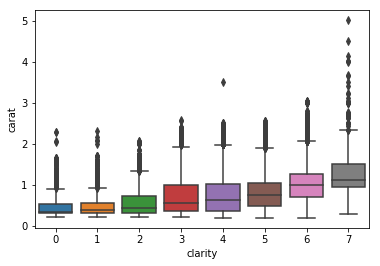

In [20]:
df_show = df.copy()  # we don't want to mess up the original DataFrame

mapping = {'SI2':6, 'SI1':5, 'VS1':3, 'VS2':4, 'VVS2':2, 'VVS1':1, 'I1':7, 'IF':0} # manually generated
df_show['clarity'] = df.clarity.map(mapping)

#sns.pairplot(df[['carat','cut_ordinal1','clarity_ordinal','price']]); plt.show()
sns.boxplot(data=df_show, x='clarity', y='carat'); plt.show()